Exploratory Data Analysis and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\peter\AppData\Local\Temp\ipykernel_12684\2583278296.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_data = pd.read_csv('C:/Users/peter/Documents/Data Science/Payment_Delay_Prediction/training.csv')
test_data = pd.read_excel('C:/Users/peter/Documents/Data Science/Payment_Delay_Prediction/testing.xlsx')

In [3]:
train_data.head()


state  account_length      area_code international_plan voice_mail_plan  \
0    HI              33  area_code_415                 no              no   
1    TN              80  area_code_415                yes              no   
2    CT              37  area_code_408                 no              no   
3    TN             106  area_code_415                 no              no   
4    TX             123  area_code_408                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0              200.5              117   
1                      0              276.5              122   
2                      0              134.9               98   
3                      0              119.2              142   
4                      0              260.9               85   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             34.09              159.9              111             13.59   
1             47.01              195.6               79             16.63   
2             22.93              248.4              130             21.11   
3             20.26              228.4              139             19.41   
4             44.35              168.5              103             14.32   

   total_night_minutes  total_night_calls  total_night_charge  \
0                196.2                 84                8.83   
1                210.3                 78                9.46   
2                236.2                113               10.63   
3                197.9                 61                8.91   
4                178.3                 91                8.02   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                16.3                 6               4.40   
1                 7.2                 3               1.94   
2                14.7                 2               3.97   
3                 8.4                 9               2.27   
4                13.3                 5               3.59   

   number_customer_service_calls payment_delay  
0                              3            no  
1                              1           yes  
2                              3            no  
3                              2            no  
4                              3            no

In [4]:
test_data.head()


state  account_length      area_code international_plan voice_mail_plan  \
0    MI             102  area_code_510                 no              no   
1    VA             139  area_code_510                 no             yes   
2    TX             128  area_code_415                 no             yes   
3    FL              79  area_code_510                 no              no   
4    DE             127  area_code_510                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0              242.2               88   
1                     23              157.6              129   
2                     40              171.2               88   
3                      0              130.2              119   
4                      0              241.7              115   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             41.17              233.2               89             19.82   
1             26.79              247.0               96             21.00   
2             29.10              145.7              109             12.38   
3             22.13              290.9              121             24.73   
4             41.09              141.5               96             12.03   

   total_night_minutes  total_night_calls  total_night_charge  \
0                188.5                121                8.48   
1                259.2                112               11.66   
2                196.8                 93                8.86   
3                194.8                140                8.77   
4                170.7                 94                7.68   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                 6.2                 6               1.67   
1                13.7                 2               3.70   
2                14.0                 6               3.78   
3                14.0                 6               3.78   
4                 4.5                 5               1.22   

   number_customer_service_calls  
0                              3  
1                              0  
2                              1  
3                              3  
4                              2

In [5]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3000 non-null   object 
 1   account_length                 3000 non-null   int64  
 2   area_code                      3000 non-null   object 
 3   international_plan             3000 non-null   object 
 4   voice_mail_plan                3000 non-null   object 
 5   number_vmail_messages          3000 non-null   int64  
 6   total_day_minutes              3000 non-null   float64
 7   total_day_calls                3000 non-null   int64  
 8   total_day_charge               3000 non-null   float64
 9   total_eve_minutes              3000 non-null   float64
 10  total_eve_calls                3000 non-null   int64  
 11  total_eve_charge               3000 non-null   float64
 12  total_night_minutes            3000 non-null   f

In [6]:
train_data.isnull().sum()


state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
payment_delay                    0
dtype: int64

In [7]:
coun_t  = train_data.nunique().to_frame(name = 'Counts')
coun_t

Counts
state                              51
account_length                    208
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1587
total_day_calls                   120
total_day_charge                 1587
total_eve_minutes                1532
total_eve_calls                   120
total_eve_charge                 1377
total_night_minutes              1533
total_night_calls                 121
total_night_charge                915
total_intl_minutes                160
total_intl_calls                   20
total_intl_charge                 160
number_customer_service_calls      10
payment_delay                       2

In [8]:
train_data.duplicated().sum()

0

In [9]:
test_data.duplicated().sum()


0

In [10]:
#looking for duplicated columns
data_trans = train_data.T
data_trans.duplicated()


state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
payment_delay                    False
dtype: bool

In [11]:
#looking for duplicated columns
test_dataset_trans = test_data.T
test_dataset_trans.duplicated()


state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
dtype: bool

In [12]:
train_data['payment_delay'].value_counts()


payment_delay
no     2587
yes     413
Name: count, dtype: int64

<Axes: xlabel='payment_delay', ylabel='count'>

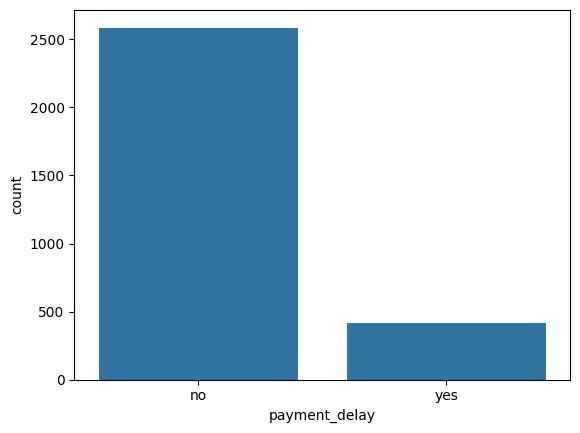

In [13]:
sns.countplot(x = 'payment_delay', data = train_data)


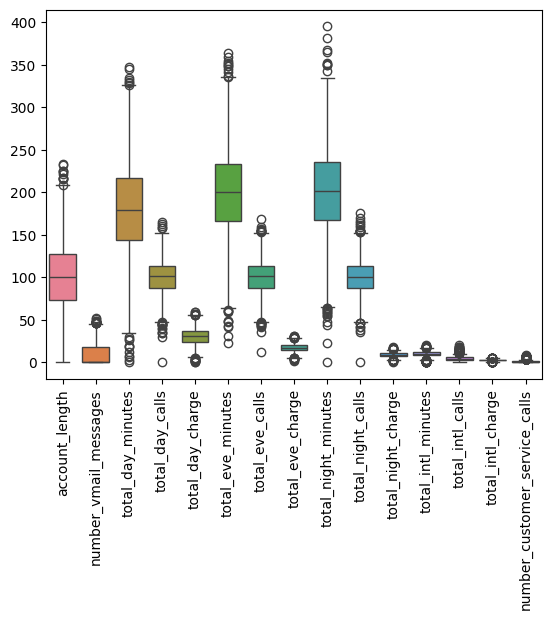

In [14]:
box = sns.boxplot(data = train_data)
box.xaxis.set_tick_params(rotation = 90)


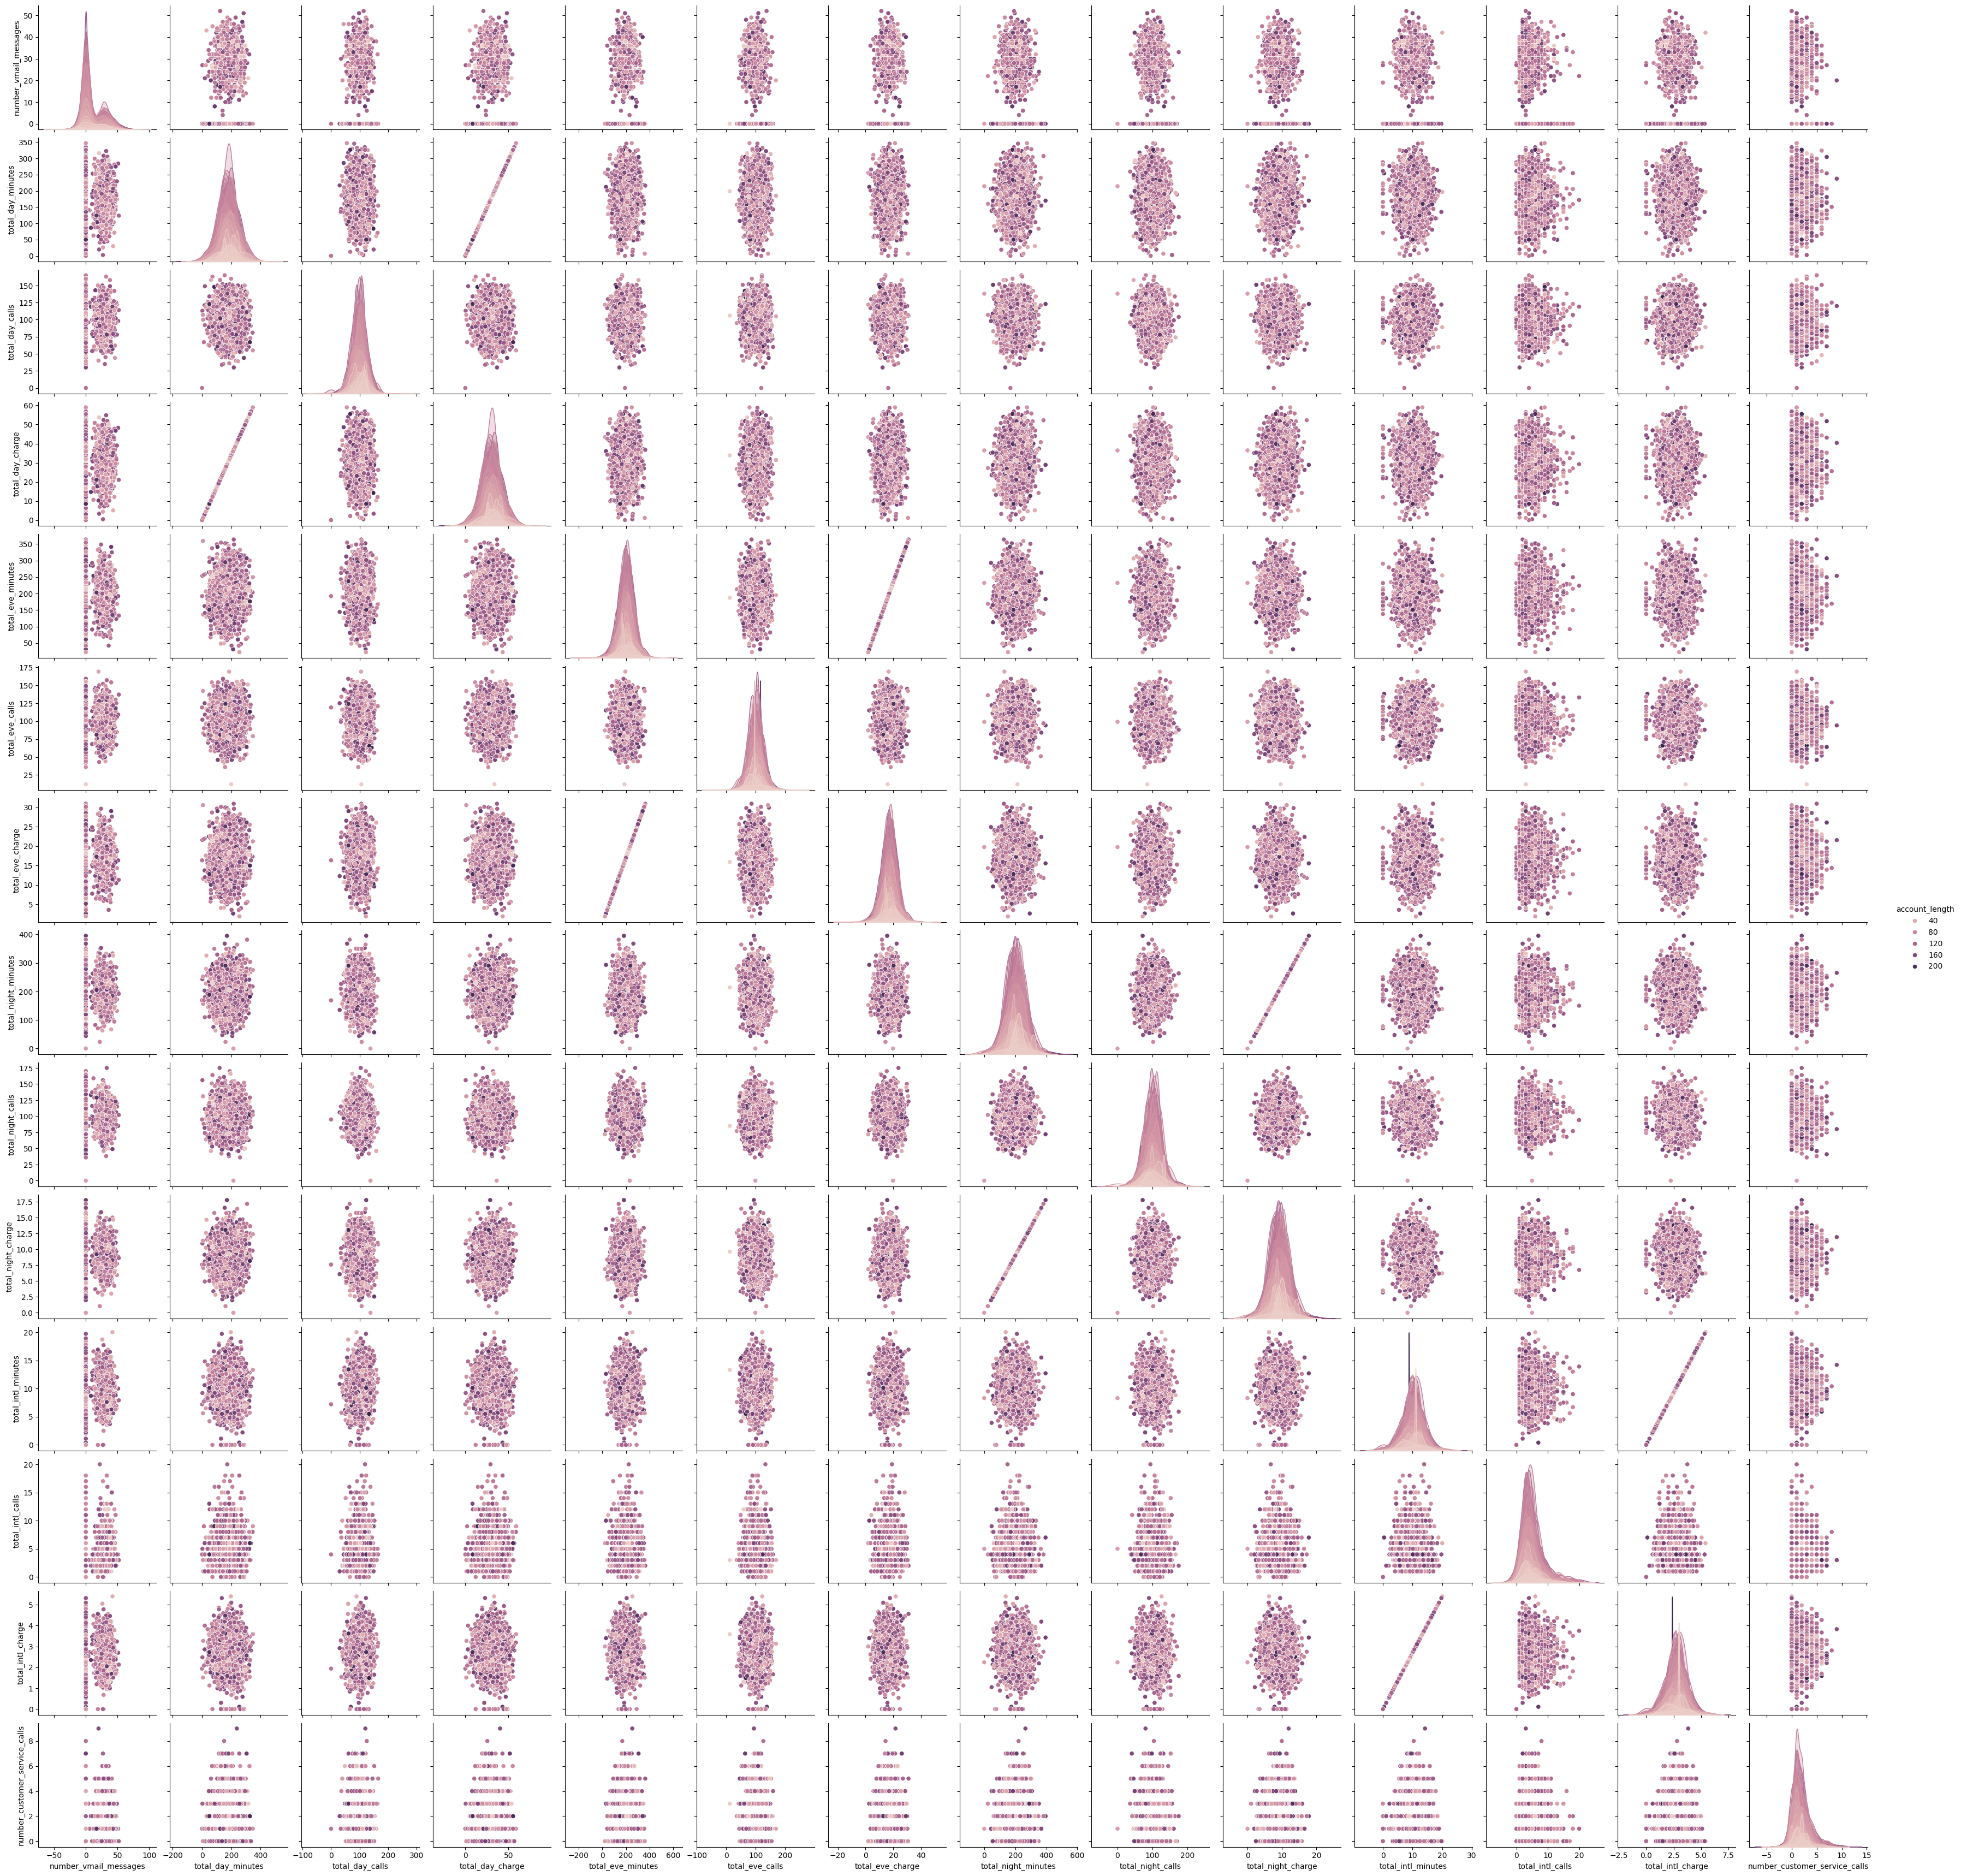

In [15]:
sns.pairplot(train_data, hue ='account_length')


Along with the pairplot, the distribution plot offers us a better view of how distributions are in our dataset. We can see we have mostly normal ditributions

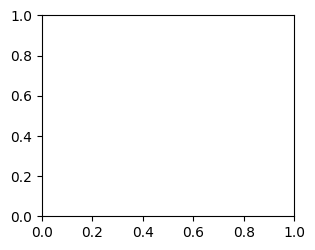

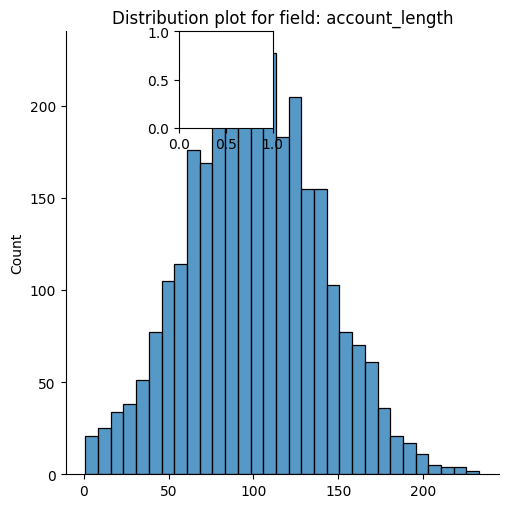

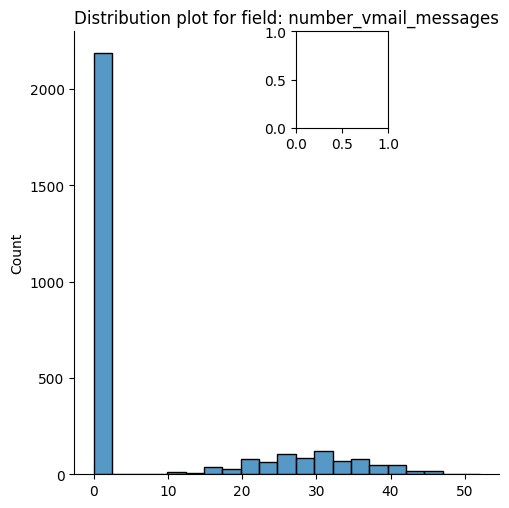

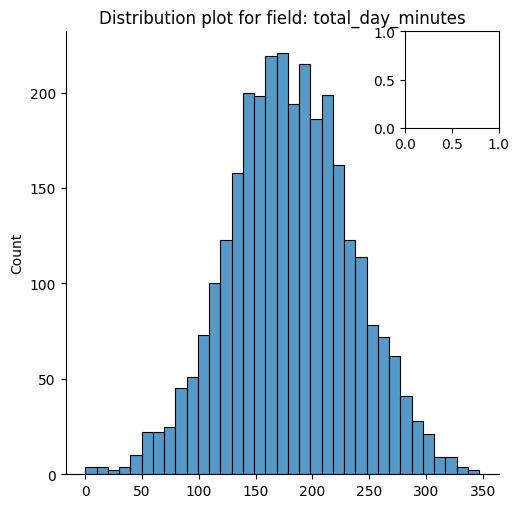

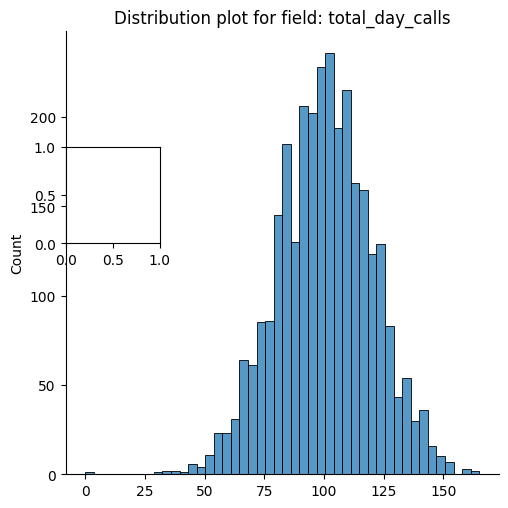

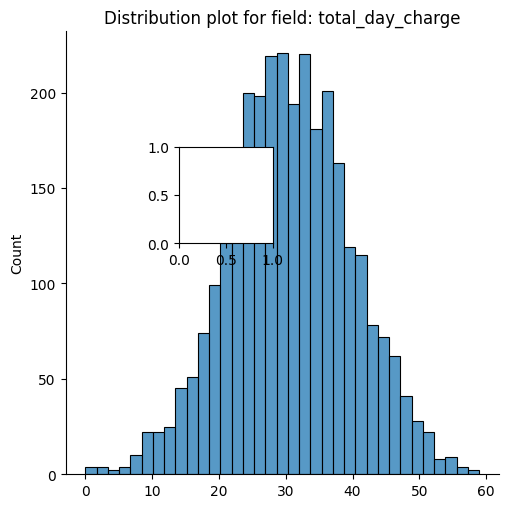

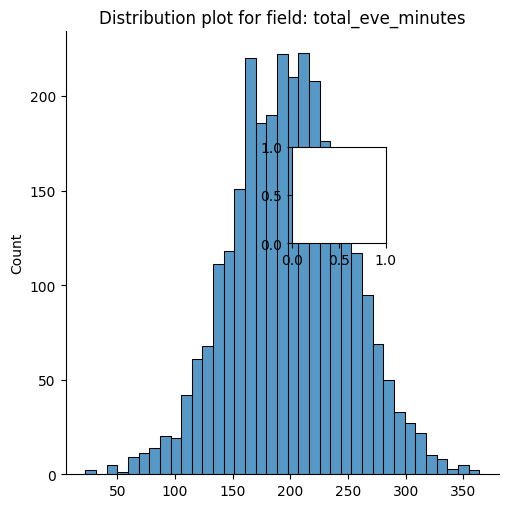

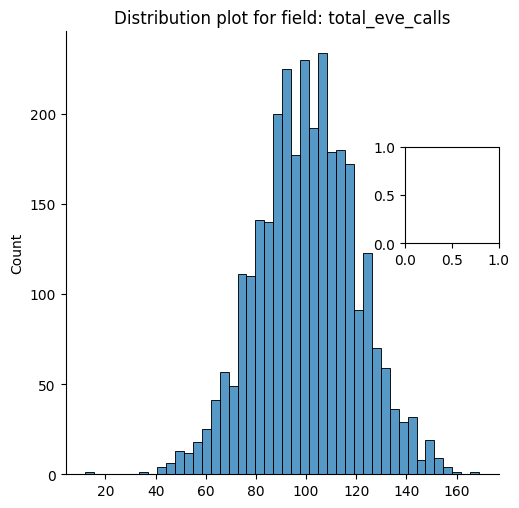

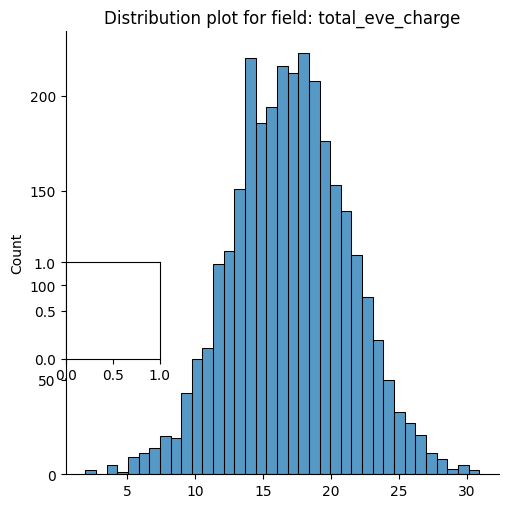

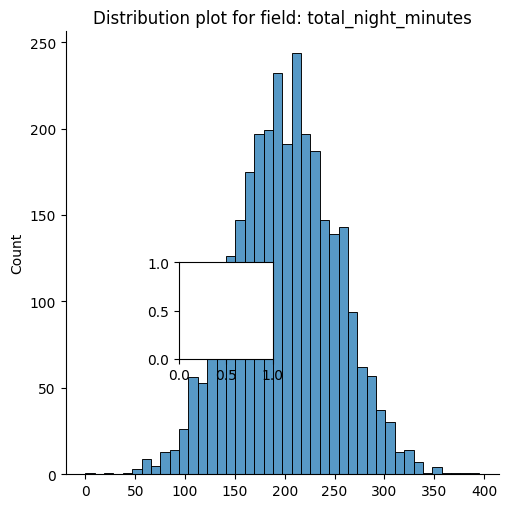

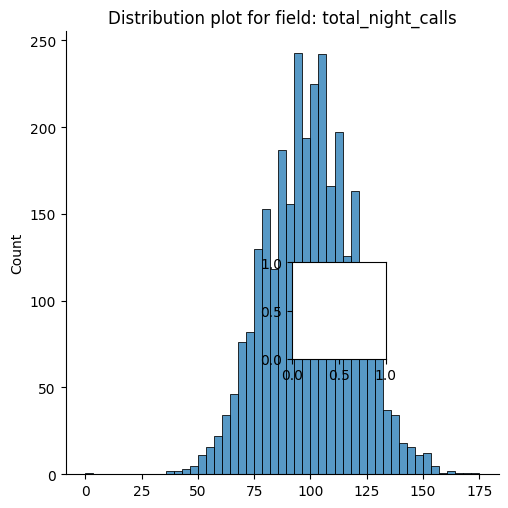

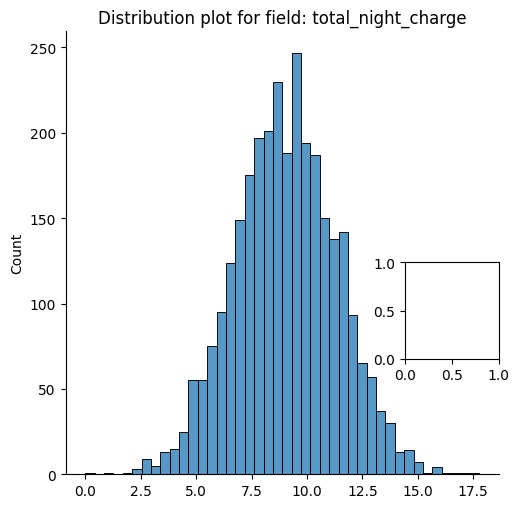

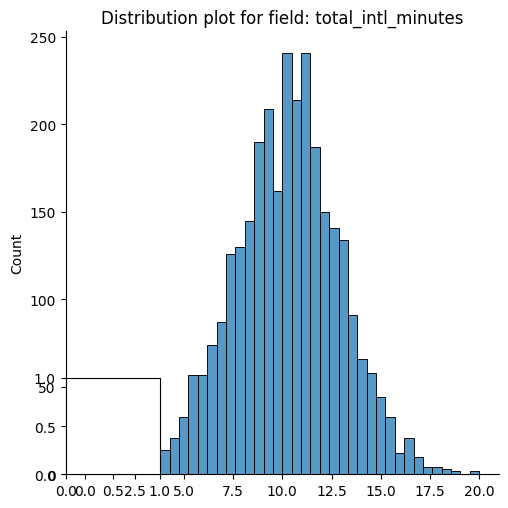

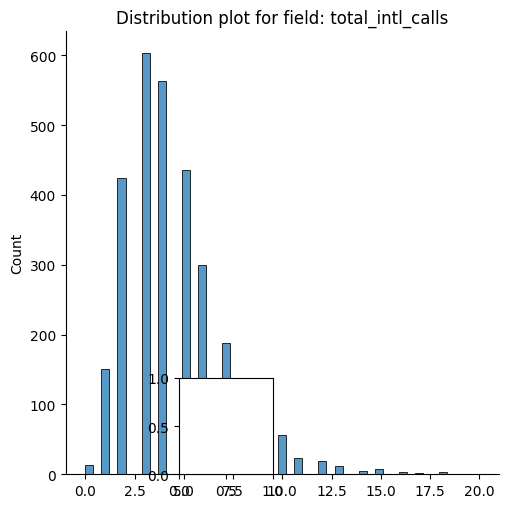

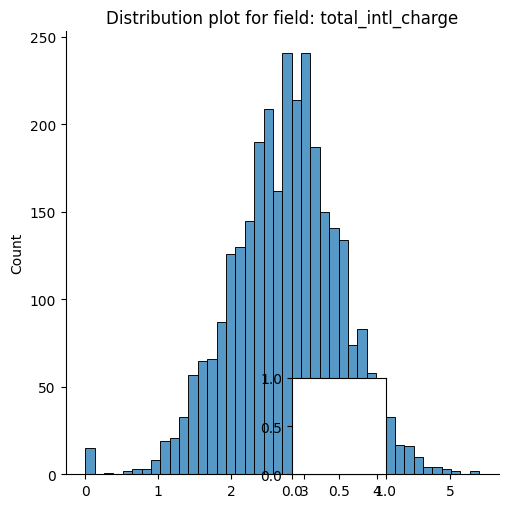

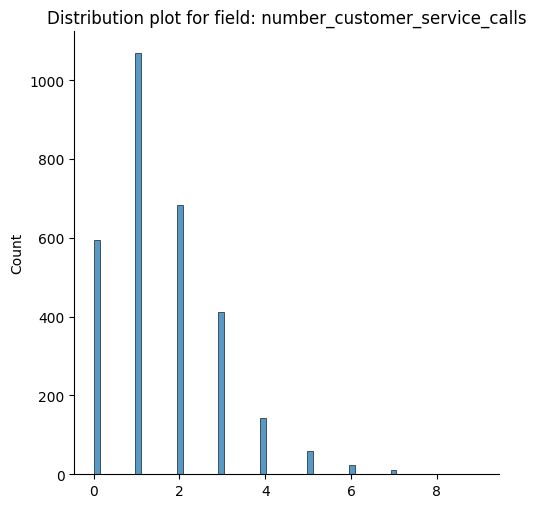

In [16]:
plt.figure(figsize = (15, 12))

for i, c in enumerate(train_data.select_dtypes(include = 'number').columns):
  plt.subplot(4, 4, i+1)
  sns.displot(train_data[c])
  plt.title('Distribution plot for field: ' + c)
  plt.xlabel('')
  plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 1.0)

plt.show()


In our dataset we have float dtypes, but we also have other dtypes. We need to encode the data for the algorithms to work

In [17]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3000 non-null   object 
 1   account_length                 3000 non-null   int64  
 2   area_code                      3000 non-null   object 
 3   international_plan             3000 non-null   object 
 4   voice_mail_plan                3000 non-null   object 
 5   number_vmail_messages          3000 non-null   int64  
 6   total_day_minutes              3000 non-null   float64
 7   total_day_calls                3000 non-null   int64  
 8   total_day_charge               3000 non-null   float64
 9   total_eve_minutes              3000 non-null   float64
 10  total_eve_calls                3000 non-null   int64  
 11  total_eve_charge               3000 non-null   float64
 12  total_night_minutes            3000 non-null   f

In [18]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'payment_delay'])

In [19]:
data_enc = encoder.fit_transform(train_data)


In [20]:
data_enc.head()


state  account_length  area_code  international_plan  voice_mail_plan  \
0      1              33          1                   1                1   
1      2              80          1                   2                1   
2      3              37          2                   1                1   
3      2             106          1                   1                1   
4      4             123          2                   1                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0              200.5              117   
1                      0              276.5              122   
2                      0              134.9               98   
3                      0              119.2              142   
4                      0              260.9               85   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             34.09              159.9              111             13.59   
1             47.01              195.6               79             16.63   
2             22.93              248.4              130             21.11   
3             20.26              228.4              139             19.41   
4             44.35              168.5              103             14.32   

   total_night_minutes  total_night_calls  total_night_charge  \
0                196.2                 84                8.83   
1                210.3                 78                9.46   
2                236.2                113               10.63   
3                197.9                 61                8.91   
4                178.3                 91                8.02   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                16.3                 6               4.40   
1                 7.2                 3               1.94   
2                14.7                 2               3.97   
3                 8.4                 9               2.27   
4                13.3                 5               3.59   

   number_customer_service_calls  payment_delay  
0                              3              1  
1                              1              2  
2                              3              1  
3                              2              1  
4                              3              1

Data normalization

In [21]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

for col in data_enc.drop(columns = ['area_code', 'international_plan', 'voice_mail_plan', 'payment_delay']).columns:
  data_enc[col] = rs.fit_transform(data_enc[col].values.reshape(-1, 1))


In [22]:
data_enc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3000 non-null   float64
 1   account_length                 3000 non-null   float64
 2   area_code                      3000 non-null   int32  
 3   international_plan             3000 non-null   int32  
 4   voice_mail_plan                3000 non-null   int32  
 5   number_vmail_messages          3000 non-null   float64
 6   total_day_minutes              3000 non-null   float64
 7   total_day_calls                3000 non-null   float64
 8   total_day_charge               3000 non-null   float64
 9   total_eve_minutes              3000 non-null   float64
 10  total_eve_calls                3000 non-null   float64
 11  total_eve_charge               3000 non-null   float64
 12  total_night_minutes            3000 non-null   f

In [23]:
data_enc['payment_delay'].unique()


array([1, 2])

Splitting the data

In [24]:
X = data_enc.drop(columns = 'payment_delay')
y = data_enc['payment_delay']

print(y)

0       1
1       2
2       1
3       1
4       1
       ..
2995    1
2996    2
2997    1
2998    1
2999    1
Name: payment_delay, Length: 3000, dtype: int32


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Training the models and evaluating the results

In [26]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
et = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()

rf.fit(X_train, y_train)
et.fit(X_train, y_train)
gbc.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_et = et.predict(X_test)
y_pred_gbc = gbc.predict(X_test)
y_pred_knn = knn.predict(X_test)

print('Random Forest: ',classification_report(y_test, y_pred_rf))
print('Extra Trees: ',classification_report(y_test, y_pred_et))
print('Gradinent Boosting: ',classification_report(y_test, y_pred_gbc))
print('KNeighbors: ', classification_report(y_test, y_pred_knn))


Random Forest:                precision    recall  f1-score   support

           1       0.95      0.99      0.97       523
           2       0.91      0.66      0.77        77

    accuracy                           0.95       600
   macro avg       0.93      0.83      0.87       600
weighted avg       0.95      0.95      0.94       600

Extra Trees:                precision    recall  f1-score   support

           1       0.94      0.99      0.96       523
           2       0.91      0.53      0.67        77

    accuracy                           0.93       600
   macro avg       0.92      0.76      0.82       600
weighted avg       0.93      0.93      0.93       600

Gradinent Boosting:                precision    recall  f1-score   support

           1       0.95      0.99      0.97       523
           2       0.88      0.68      0.76        77

    accuracy                           0.95       600
   macro avg       0.92      0.83      0.87       600
weighted avg       0.94

We will evaluate the results offered by XGBClassifier.
We need to use LabelEncoder to obtain values of 0 and 1 for the targeted data.

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_enc['payment_delay'] = le.fit_transform(data_enc['payment_delay'])


In [28]:
X = data_enc.drop(columns = 'payment_delay')
y = data_enc['payment_delay']

print(y)

0       0
1       1
2       0
3       0
4       0
       ..
2995    0
2996    1
2997    0
2998    0
2999    0
Name: payment_delay, Length: 3000, dtype: int64


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

xgb = XGBClassifier(random_state=123)
xgb.fit(X_train, y_train)
y_test_hat = xgb.predict(X_test)

def metrics(y_test, y_pred):
    class_rep = classification_report(y_test, y_test_hat)
    roc_auc = roc_auc_score(y_test, y_test_hat)
    conf_mat = confusion_matrix(y_test, y_test_hat)
    acc_score = accuracy_score(y_test, y_test_hat)

    print('Classification report: ', class_rep)
    print('Roc_auc score: ', roc_auc)
    print('Confusion matrix: ', conf_mat)
    print('Accuracy score: ', acc_score)

metrics(y_test, y_test_hat)


Classification report:                precision    recall  f1-score   support

           0       0.96      0.99      0.97       523
           1       0.89      0.73      0.80        77

    accuracy                           0.95       600
   macro avg       0.92      0.86      0.89       600
weighted avg       0.95      0.95      0.95       600

Roc_auc score:  0.856944203024509
Confusion matrix:  [[516   7]
 [ 21  56]]
Accuracy score:  0.9533333333333334


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_data['state'] = le.fit_transform(test_data['state'])
test_data['area_code'] = le.fit_transform(test_data['area_code'])
test_data['international_plan'] = le.fit_transform(test_data['international_plan'])
test_data['voice_mail_plan'] = le.fit_transform(test_data['voice_mail_plan'])

test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          202 non-null    int32  
 1   account_length                 202 non-null    int64  
 2   area_code                      202 non-null    int32  
 3   international_plan             202 non-null    int32  
 4   voice_mail_plan                202 non-null    int32  
 5   number_vmail_messages          202 non-null    int64  
 6   total_day_minutes              202 non-null    float64
 7   total_day_calls                202 non-null    int64  
 8   total_day_charge               202 non-null    float64
 9   total_eve_minutes              202 non-null    float64
 10  total_eve_calls                202 non-null    int64  
 11  total_eve_charge               202 non-null    float64
 12  total_night_minutes            202 non-null    flo

In [32]:
# Saving results to .csv file

features = test_data[X.columns]
test_predictions = knn.predict(features)

features['payment_delay'] = test_predictions
test_data['payment_delay'] = test_predictions

# Create a DataFrame containing the test data and corresponding predictions
results = pd.DataFrame({'CustomerIndex': range(1, len(test_data) + 1), 'PaymentDelayPrediction': test_predictions})

selected_customers = results[results['PaymentDelayPrediction'] == 1].head(300)


print("Indices of the Customers Likely to Register Payment Delays:")
print(selected_customers['CustomerIndex'].values)

test_data.to_csv('testing_predictions.csv', index = True)


Indices of the Customers Likely to Register Payment Delays:
[  3   9  17  47  65  66  67  74  81  83  84  85  97 102 126 157 160 169
 179]
